# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

> **AI-generated notebook**  
> This notebook was auto-generated by an AI system and has not been fully verified by a human expert. Please proceed with caution and validate any code or conclusions before relying on them for scientific work.

## Dandiset Overview

- **Title:** Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
- **DOI:** [https://doi.org/10.48324/dandi.001195/0.250408.1733](https://doi.org/10.48324/dandi.001195/0.250408.1733)  
- **DANDI Archive:** [https://dandiarchive.org/dandiset/001195/0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733)
- **Description:**  
  Supporting data for the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" (see DOI above). This dataset includes both in vivo calcium imaging data with supporting behavioral videos and ex vivo patch-clamp electrophysiology recordings.
- **Keywords:** optogenetics, behavior videos, calcium imaging, electrophysiology, mouse behavior, Dorsal Raphe Nucleus (DRN), Dopamine neurons

- **Access:** Open Access (CC-BY-4.0)
- **Contributors:**  
  Keyes, Laurel; Lee, Christopher R.; Wichmann, Romy; Matthews, Gillian A.; Tye, Kay M. and others
- **Techniques:** voltage/current clamp, one-photon microscopy, analytical, surgical

### What this notebook covers
- How to access and explore data from Dandiset 001195 using Python and the DANDI API
- Loading a sample NWB file from the Dandiset and understanding its structure
- Visualizing an example electrophysiological current clamp recording trace and stimulus
- Providing links for further interactive exploration

## Required Packages

This notebook assumes the following packages are already installed:

- `dandi`
- `pynwb`
- `remfile`
- `h5py`
- `matplotlib`
- `numpy`

If you do not have these packages, please install them before running the notebook.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733

First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (ID: a243dde4-c270-42a9-8550-025f5ffcd5a7)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (ID: 85bf2dfb-0e2f-442d-b11c-e0d38bcc8783)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (ID: 1bbc22a8-059d-4cd2-80c6-e1c20969ab19)


## Loading and Exploring a Sample NWB File

For illustration, we'll examine the NWB file:

- **Path:** `sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`
- **URL:** https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/

[Interactive preview on Neurosift (opens in browser)](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft)

The code below shows how to access and read this file, and how to explore its contents programmatically.

In [2]:
import pynwb
import h5py
import remfile

nwb_url = "https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

### File and Subject Metadata

In [3]:
print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Institution:", getattr(nwb, "institution", None))
print("Lab:", getattr(nwb, "lab", None))

subj = getattr(nwb, "subject", None)
if subj:
    print("Subject ID:", getattr(subj, "subject_id", None))
    print("Species:", getattr(subj, "species", None))
    print("Strain:", getattr(subj, "strain", None))
    print("Sex:", getattr(subj, "sex", None))
    print("Age:", getattr(subj, "age", None))
    print("Description:", getattr(subj, "description", None))
else:
    print("No subject metadata found.")

Session description: episodic stimulation
Session start time: 2015-03-24 13:41:14-07:00
Institution: Massachusetts Institute of Technology
Lab: Kay Tye Lab
Subject ID: 23
Species: Mus musculus
Strain: DAT::Cre
Sex: F
Age: P302D
Description: AAV5-DIO-ChR2-eYFP into DRN


### NWB File Data Structure

The file contains many acquisition series and stimulus protocols. Below we list the available series in these groups:

In [4]:
print("Available acquisition series:")
for k in nwb.acquisition.keys():
    print("-", k)

print("\nAvailable stimulus series:")
if hasattr(nwb, "stimulus"):
    for k in nwb.stimulus.keys():
        print("-", k)
else:
    print("None found.")

Available acquisition series:
- current_clamp-response-01-ch-0
- current_clamp-response-01-ch-1
- current_clamp-response-02-ch-0
- current_clamp-response-02-ch-1
- current_clamp-response-03-ch-0
- current_clamp-response-03-ch-1
- current_clamp-response-04-ch-0
- current_clamp-response-04-ch-1
- current_clamp-response-05-ch-0
- current_clamp-response-05-ch-1
- current_clamp-response-06-ch-0
- current_clamp-response-06-ch-1
- current_clamp-response-07-ch-0
- current_clamp-response-07-ch-1
- current_clamp-response-08-ch-0
- current_clamp-response-08-ch-1
- current_clamp-response-09-ch-0
- current_clamp-response-09-ch-1
- current_clamp-response-10-ch-0
- current_clamp-response-10-ch-1
- current_clamp-response-11-ch-0
- current_clamp-response-11-ch-1
- current_clamp-response-12-ch-0
- current_clamp-response-12-ch-1
- current_clamp-response-13-ch-0
- current_clamp-response-13-ch-1
- current_clamp-response-14-ch-0
- current_clamp-response-14-ch-1
- current_clamp-response-15-ch-0
- current_cla

#### Summary Table of the NWB File Content

In [5]:
from IPython.display import Markdown, display

def list_keys_grouped(d):
    return "\n".join([f"- `{k}`" for k in d.keys()])

acq_keys = list(nwb.acquisition.keys())
stim_keys = list(nwb.stimulus.keys()) if hasattr(nwb, "stimulus") else []
summary_md = f"""
**Acquisition series (example):**
{list_keys_grouped(nwb.acquisition)}

**Stimulus series (example):**
{list_keys_grouped(nwb.stimulus) if hasattr(nwb, "stimulus") else "None"}
"""
display(Markdown(summary_md))


**Acquisition series (example):**
- `current_clamp-response-01-ch-0`
- `current_clamp-response-01-ch-1`
- `current_clamp-response-02-ch-0`
- `current_clamp-response-02-ch-1`
- `current_clamp-response-03-ch-0`
- `current_clamp-response-03-ch-1`
- `current_clamp-response-04-ch-0`
- `current_clamp-response-04-ch-1`
- `current_clamp-response-05-ch-0`
- `current_clamp-response-05-ch-1`
- `current_clamp-response-06-ch-0`
- `current_clamp-response-06-ch-1`
- `current_clamp-response-07-ch-0`
- `current_clamp-response-07-ch-1`
- `current_clamp-response-08-ch-0`
- `current_clamp-response-08-ch-1`
- `current_clamp-response-09-ch-0`
- `current_clamp-response-09-ch-1`
- `current_clamp-response-10-ch-0`
- `current_clamp-response-10-ch-1`
- `current_clamp-response-11-ch-0`
- `current_clamp-response-11-ch-1`
- `current_clamp-response-12-ch-0`
- `current_clamp-response-12-ch-1`
- `current_clamp-response-13-ch-0`
- `current_clamp-response-13-ch-1`
- `current_clamp-response-14-ch-0`
- `current_clamp-response-14-ch-1`
- `current_clamp-response-15-ch-0`
- `current_clamp-response-15-ch-1`
- `current_clamp-response-16-ch-0`
- `current_clamp-response-16-ch-1`
- `current_clamp-response-17-ch-0`
- `current_clamp-response-17-ch-1`
- `current_clamp-response-18-ch-0`
- `current_clamp-response-18-ch-1`
- `current_clamp-response-19-ch-0`
- `current_clamp-response-19-ch-1`
- `current_clamp-response-20-ch-0`
- `current_clamp-response-20-ch-1`
- `current_clamp-response-21-ch-0`
- `current_clamp-response-21-ch-1`
- `current_clamp-response-42-ch-0`
- `current_clamp-response-42-ch-1`
- `current_clamp-response-43-ch-0`
- `current_clamp-response-43-ch-1`
- `histology_images`
- `voltage_clamp-response-22-ch-0`
- `voltage_clamp-response-22-ch-1`
- `voltage_clamp-response-23-ch-0`
- `voltage_clamp-response-23-ch-1`
- `voltage_clamp-response-24-ch-0`
- `voltage_clamp-response-24-ch-1`
- `voltage_clamp-response-25-ch-0`
- `voltage_clamp-response-25-ch-1`
- `voltage_clamp-response-26-ch-0`
- `voltage_clamp-response-26-ch-1`
- `voltage_clamp-response-27-ch-0`
- `voltage_clamp-response-27-ch-1`
- `voltage_clamp-response-28-ch-0`
- `voltage_clamp-response-28-ch-1`
- `voltage_clamp-response-29-ch-0`
- `voltage_clamp-response-29-ch-1`
- `voltage_clamp-response-30-ch-0`
- `voltage_clamp-response-30-ch-1`
- `voltage_clamp-response-31-ch-0`
- `voltage_clamp-response-31-ch-1`
- `voltage_clamp-response-32-ch-0`
- `voltage_clamp-response-32-ch-1`
- `voltage_clamp-response-33-ch-0`
- `voltage_clamp-response-33-ch-1`
- `voltage_clamp-response-34-ch-0`
- `voltage_clamp-response-34-ch-1`
- `voltage_clamp-response-35-ch-0`
- `voltage_clamp-response-35-ch-1`
- `voltage_clamp-response-36-ch-0`
- `voltage_clamp-response-36-ch-1`
- `voltage_clamp-response-37-ch-0`
- `voltage_clamp-response-37-ch-1`
- `voltage_clamp-response-38-ch-0`
- `voltage_clamp-response-38-ch-1`
- `voltage_clamp-response-39-ch-0`
- `voltage_clamp-response-39-ch-1`
- `voltage_clamp-response-40-ch-0`
- `voltage_clamp-response-40-ch-1`
- `voltage_clamp-response-41-ch-0`
- `voltage_clamp-response-41-ch-1`

**Stimulus series (example):**
- `stimulus-01-ch-0`
- `stimulus-01-ch-1`
- `stimulus-02-ch-0`
- `stimulus-02-ch-1`
- `stimulus-03-ch-0`
- `stimulus-03-ch-1`
- `stimulus-04-ch-0`
- `stimulus-04-ch-1`
- `stimulus-05-ch-0`
- `stimulus-05-ch-1`
- `stimulus-06-ch-0`
- `stimulus-06-ch-1`
- `stimulus-07-ch-0`
- `stimulus-07-ch-1`
- `stimulus-08-ch-0`
- `stimulus-08-ch-1`
- `stimulus-09-ch-0`
- `stimulus-09-ch-1`
- `stimulus-10-ch-0`
- `stimulus-10-ch-1`
- `stimulus-11-ch-0`
- `stimulus-11-ch-1`
- `stimulus-12-ch-0`
- `stimulus-12-ch-1`
- `stimulus-13-ch-0`
- `stimulus-13-ch-1`
- `stimulus-14-ch-0`
- `stimulus-14-ch-1`
- `stimulus-15-ch-0`
- `stimulus-15-ch-1`
- `stimulus-16-ch-0`
- `stimulus-16-ch-1`
- `stimulus-17-ch-0`
- `stimulus-17-ch-1`
- `stimulus-18-ch-0`
- `stimulus-18-ch-1`
- `stimulus-19-ch-0`
- `stimulus-19-ch-1`
- `stimulus-20-ch-0`
- `stimulus-20-ch-1`
- `stimulus-21-ch-0`
- `stimulus-21-ch-1`
- `stimulus-22-ch-0`
- `stimulus-22-ch-1`
- `stimulus-23-ch-0`
- `stimulus-23-ch-1`
- `stimulus-24-ch-0`
- `stimulus-24-ch-1`
- `stimulus-25-ch-0`
- `stimulus-25-ch-1`
- `stimulus-26-ch-0`
- `stimulus-26-ch-1`
- `stimulus-27-ch-0`
- `stimulus-27-ch-1`
- `stimulus-28-ch-0`
- `stimulus-28-ch-1`
- `stimulus-29-ch-0`
- `stimulus-29-ch-1`
- `stimulus-30-ch-0`
- `stimulus-30-ch-1`
- `stimulus-31-ch-0`
- `stimulus-31-ch-1`
- `stimulus-32-ch-0`
- `stimulus-32-ch-1`
- `stimulus-33-ch-0`
- `stimulus-33-ch-1`
- `stimulus-34-ch-0`
- `stimulus-34-ch-1`
- `stimulus-35-ch-0`
- `stimulus-35-ch-1`
- `stimulus-36-ch-0`
- `stimulus-36-ch-1`
- `stimulus-37-ch-0`
- `stimulus-37-ch-1`
- `stimulus-38-ch-0`
- `stimulus-38-ch-1`
- `stimulus-39-ch-0`
- `stimulus-39-ch-1`
- `stimulus-40-ch-0`
- `stimulus-40-ch-1`
- `stimulus-41-ch-0`
- `stimulus-41-ch-1`
- `stimulus-42-ch-0`
- `stimulus-42-ch-1`
- `stimulus-43-ch-0`
- `stimulus-43-ch-1`


### Visualize Example Response and Stimulus

Here we load and plot the "current_clamp-response-01-ch-0" and "stimulus-01-ch-0" as a demonstration. These are typical for electrophysiology patch data.  
Note: Only a single sweep/pair is shown for illustration.


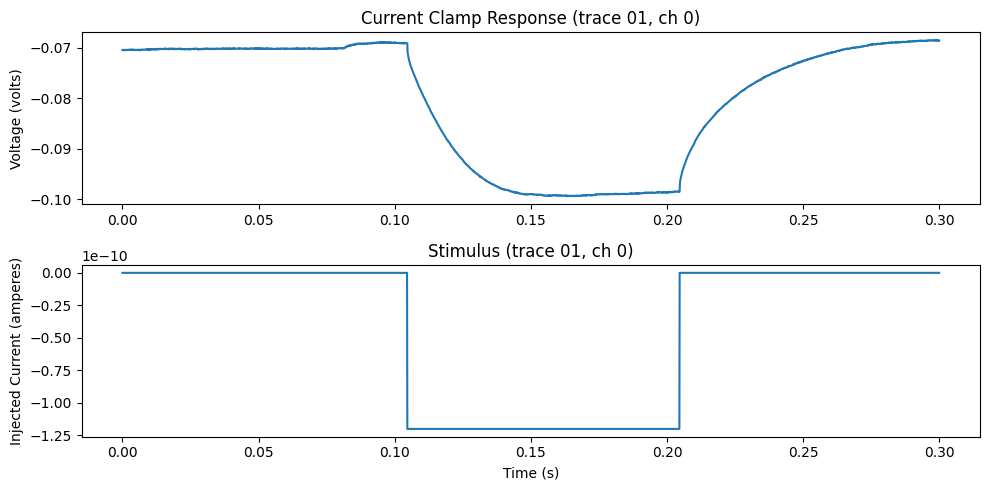

In [6]:
import numpy as np
import matplotlib.pyplot as plt

acq_key = "current_clamp-response-01-ch-0"
stim_key = "stimulus-01-ch-0"

if acq_key in nwb.acquisition and stim_key in nwb.stimulus:
    acq = nwb.acquisition[acq_key]
    stim = nwb.stimulus[stim_key]
    acq_data = acq.data[:]
    stim_data = stim.data[:]
    sample_rate = acq.rate
    t = np.arange(len(acq_data)) / sample_rate

    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(t, acq_data * acq.conversion)
    plt.ylabel(f"Voltage ({acq.unit})")
    plt.title("Current Clamp Response (trace 01, ch 0)")

    plt.subplot(2, 1, 2)
    plt.plot(t, stim_data * stim.conversion)
    plt.ylabel(f"Injected Current ({stim.unit})")
    plt.xlabel("Time (s)")
    plt.title("Stimulus (trace 01, ch 0)")

    plt.tight_layout()
    plt.show()
else:
    print("Example series for plotting not found.")

#### About the Plot

The top plot visualizes the cell voltage in response to a current injection, while the lower plot shows the actual stimulus waveform injected into the cell. Step responses like these are used to characterize intrinsic electrophysiological properties.  

Both traces are shown in their true physical units (volts, amperes) as recorded in the NWB file.

Advanced analyses may involve iterating through all sweeps, performing spike detection, or averaging sweeps, but such computations are outside the scope of this introductory exploration.

## Summary and Next Steps

In this notebook, we've shown:
- How to access rich neurophysiology (intracellular) data from Dandiset 001195 using Python, the Dandi API, and NWB tools.
- Navigation of the data structure to identify available series.
- Visualization of a representative current clamp and stimulus trace.

**Possible next steps for researchers:**
- Systematic analysis of all sweeps and experimental conditions
- Quantify membrane parameters or spike output
- Explore additional NWB files in this Dandiset (see asset listing above)
- Combine with behavior or imaging data (also present in this Dandiset)

Explore interactively with neurosift: [Open in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft)